Import necessary libraries

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset from excel file

In [229]:
censusdf = pd.read_excel('C:\\Users\\SHUBHAM KADAM\\SHUBHAM PROJECTS\\Data analytics projects\\India census\\India Census 2011.xlsx')

Dataset Before dropping

In [230]:
censusdf.info()
censusdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19993 entries, 0 to 19992
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Serial no                       19992 non-null  float64
 1   State code                      19992 non-null  float64
 2   District code                   19992 non-null  float64
 3   Sub District code               19992 non-null  float64
 4   Level                           19992 non-null  object 
 5   Name                            19992 non-null  object 
 6   Rural/Urban                     19992 non-null  object 
 7   Number of inhabited villages    19993 non-null  int64  
 8   Number of uninhabited villages  19992 non-null  float64
 9   Number of towns                 19992 non-null  float64
 10  Number of households            19992 non-null  float64
 11  Total peoples                   19992 non-null  float64
 12  Males                           

,Serial no,State code,District code,Sub District code,Level,Name,Rural/Urban,Number of inhabited villages,Number of uninhabited villages,Number of towns,Number of households,Total peoples,Males,Females,Area in sqkm,Population per sqkm
0,1.0,0.0,0.0,0.0,INDIA,INDIA,Total,597608,43324.0,7933.0,249501663.0,1.210855e+09,623270258.0,587584719.0,3287469.00,382.0
1,2.0,0.0,0.0,0.0,INDIA,INDIA,Rural,597608,43324.0,0.0,168612897.0,8.337489e+08,427781058.0,405967794.0,3101473.97,279.0
2,3.0,0.0,0.0,0.0,INDIA,INDIA,Urban,0,0.0,7933.0,80888766.0,3.771061e+08,195489200.0,181616925.0,102252.03,3685.0
3,4.0,1.0,0.0,0.0,STATE,JAMMU & KASHMIR,Total,6337,216.0,122.0,2119718.0,1.254130e+07,6640662.0,5900640.0,222236.00,124.0
4,5.0,1.0,0.0,0.0,STATE,JAMMU & KASHMIR,Rural,6337,216.0,0.0,1553433.0,9.108060e+06,4774477.0,4333583.0,220990.10,91.0


Droping all records with value Total and Level India

In [231]:
censusdf=censusdf[(censusdf['Rural/Urban']!='Total') & (censusdf['Level']!='INDIA')]

Dataset After dropping

In [232]:
censusdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13327 entries, 4 to 19992
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Serial no                       13326 non-null  float64
 1   State code                      13326 non-null  float64
 2   District code                   13326 non-null  float64
 3   Sub District code               13326 non-null  float64
 4   Level                           13326 non-null  object 
 5   Name                            13326 non-null  object 
 6   Rural/Urban                     13326 non-null  object 
 7   Number of inhabited villages    13327 non-null  int64  
 8   Number of uninhabited villages  13326 non-null  float64
 9   Number of towns                 13326 non-null  float64
 10  Number of households            13326 non-null  float64
 11  Total peoples                   13326 non-null  float64
 12  Males                           13326

Dataset after Removing duplicates and Null values

In [233]:
censusdf.dropna(inplace=True)
censusdf.drop_duplicates(inplace=True)
censusdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13214 entries, 4 to 19991
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Serial no                       13214 non-null  float64
 1   State code                      13214 non-null  float64
 2   District code                   13214 non-null  float64
 3   Sub District code               13214 non-null  float64
 4   Level                           13214 non-null  object 
 5   Name                            13214 non-null  object 
 6   Rural/Urban                     13214 non-null  object 
 7   Number of inhabited villages    13214 non-null  int64  
 8   Number of uninhabited villages  13214 non-null  float64
 9   Number of towns                 13214 non-null  float64
 10  Number of households            13214 non-null  float64
 11  Total peoples                   13214 non-null  float64
 12  Males                           13214

Some common analysis

In [234]:
stateruldf=censusdf[(censusdf['Level']=='STATE') & (censusdf['Rural/Urban']=='Rural')].shape[0]
print(f"Total Rural States are {stateruldf}\n")


stateurbdf=censusdf[(censusdf['Level']=='STATE') & (censusdf['Rural/Urban']=='Urban')].shape[0]
print(f"Total Urban States are {stateurbdf}\n")


distruldf=censusdf[(censusdf['Level']=='DISTRICT') & (censusdf['Rural/Urban']=='Rural')].shape[0]
print(f"Total Rural Districts are {distruldf}\n")


disturbdf=censusdf[(censusdf['Level']=='DISTRICT') & (censusdf['Rural/Urban']=='Urban')].shape[0]
print(f"Total Urban Districts are {disturbdf}\n")


sbdistruldf=censusdf[(censusdf['Level']=='SUB-DISTRICT') & (censusdf['Rural/Urban']=='Rural')].shape[0]
print(f"Total Rural SubDistricts are {sbdistruldf}\n")


sbdisturbdf=censusdf[(censusdf['Level']=='SUB-DISTRICT') & (censusdf['Rural/Urban']=='Urban')].shape[0]
print(f"Total Urban SubDistricts are {sbdisturbdf}\n")

Total Rural States are 34

Total Urban States are 34

Total Rural Districts are 624

Total Urban Districts are 619

Total Rural SubDistricts are 5955

Total Urban SubDistricts are 5948



  Rural/Urban  Total peoples
0       Rural   2.498754e+09
1       Urban   1.130156e+09


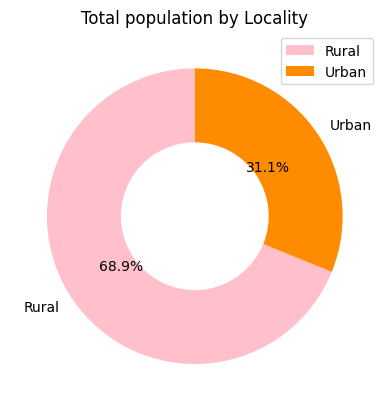

In [235]:
rulurbdf=censusdf.groupby('Rural/Urban')['Total peoples'].sum().reset_index()
print(rulurbdf)
plt.Figure(figsize=(10,5))
plt.pie(rulurbdf['Total peoples'],labels=rulurbdf['Rural/Urban'],startangle=90,wedgeprops={'width':0.5},autopct='%1.1f%%',colors=['pink','darkorange'])
plt.title("Total population by Locality")
plt.legend()
plt.show()

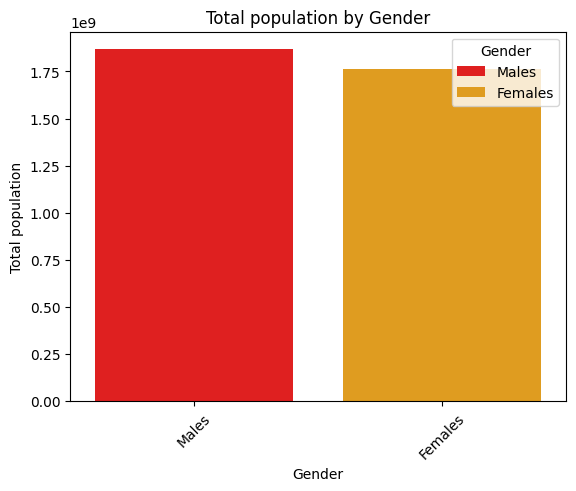

Sex ratio in India according to 2011 census is 0.9427 i.e 943 females per 1000 males


In [236]:
genderdf=censusdf[['Males','Females']].sum().reset_index()
sns.barplot(data=genderdf,x=genderdf.index,y=0,hue=genderdf['index'],palette=['red','orange'])
plt.title("Total population by Gender")
plt.ylabel("Total population")
plt.xlabel("Gender")
plt.legend(title='Gender')
plt.xticks(ticks=[0,1],labels=['Males','Females'],rotation=45)
plt.show()

# From the result we can say that the males are more in number than females.
sex_ratio=(censusdf['Females'].sum()/censusdf['Males'].sum())
print(f"Sex ratio in India according to 2011 census is {sex_ratio:.4f} i.e {sex_ratio*1000:.0f} females per 1000 males")

Area distribution 
Number of inhabited villages      1780987.0
Number of uninhabited villages     129223.0
Number of towns                     23703.0
dtype: float64


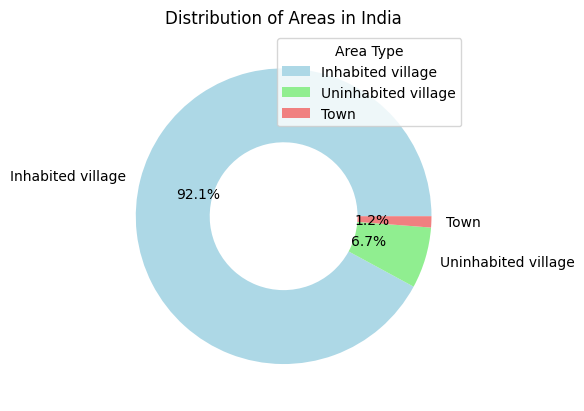

In [237]:
areadf=censusdf[['Number of inhabited villages','Number of uninhabited villages','Number of towns']].sum()
plt.Figure(figsize=(10,5))
print(f"Area distribution \n{areadf}")
plt.pie(areadf,labels=['Inhabited village','Uninhabited village','Town'], autopct='%1.1f%%', colors=['lightblue','lightgreen','lightcoral'],wedgeprops={'width':0.5})
plt.legend(title="Area Type",loc='upper right')
plt.title("Distribution of Areas in India")
plt.show()

Top 10 States population 
             Name  Total peoples
0   UTTAR PRADESH    199812341.0
1     MAHARASHTRA    112374333.0
2           BIHAR    104099452.0
3     WEST BENGAL     91276115.0
4  ANDHRA PRADESH     84580777.0
5  MADHYA PRADESH     72626809.0
6      TAMIL NADU     72147030.0
7       RAJASTHAN     68548437.0
8       KARNATAKA     61095297.0
9         GUJARAT     60439692.0

Top 10 Districts population 
                         Name  Total peoples
0                       Thane     11060148.0
1  North Twenty Four Parganas     10009781.0
2                   Bangalore      9621551.0
3                        Pune      9429408.0
4             Mumbai Suburban      9356962.0
5  South Twenty Four Parganas      8161961.0
6                 Barddhaman       7717563.0
7                   Ahmadabad      7214225.0
8                Murshidabad       7103807.0
9                      Jaipur      6626178.0

Top 10 Sub-Districts population 
             Name  Total peoples
0  Ahmadabad City  

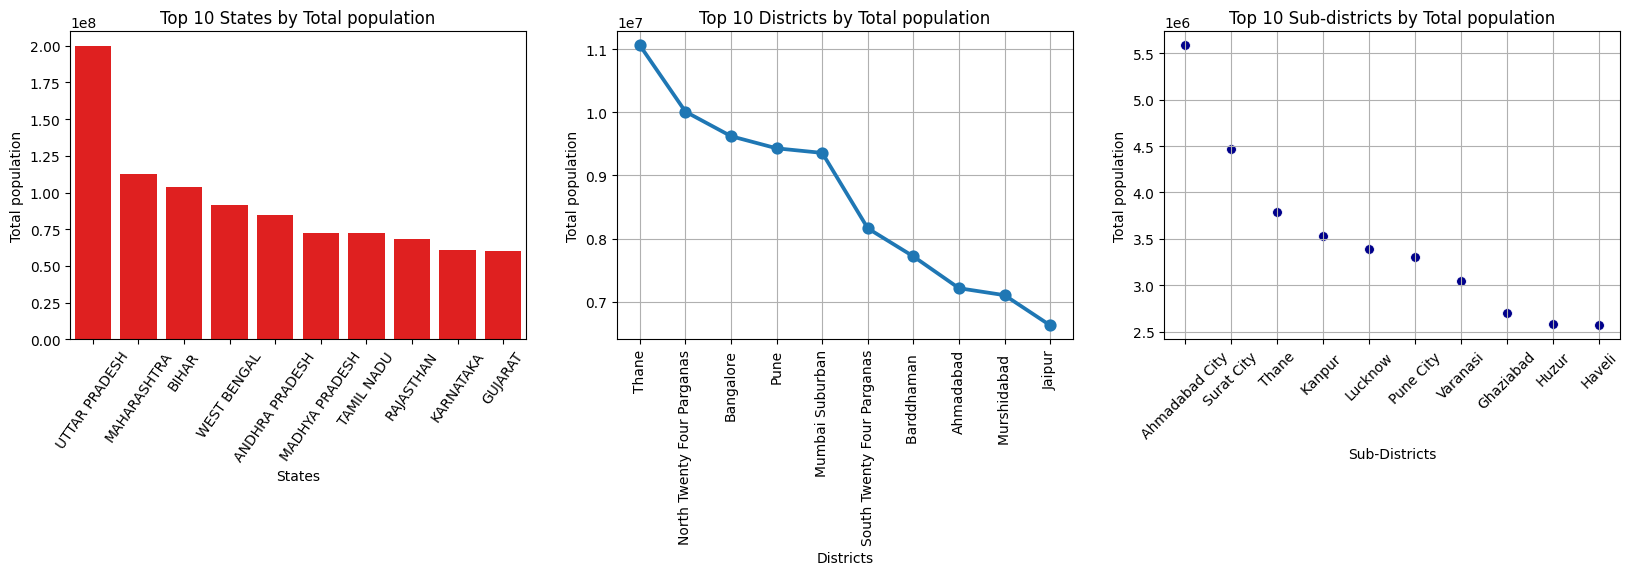

In [238]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 , figsize=(20, 4))


stdf=censusdf[censusdf['Level']=='STATE'].groupby('Name')['Total peoples'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=stdf,x=stdf['Name'],y='Total peoples',color='red',ax=ax1)
ax1.set_title("Top 10 States by Total population")
ax1.set_xlabel("States")
ax1.set_ylabel("Total population")
ax1.tick_params(axis='x',rotation=55)




distdf=censusdf[censusdf['Level']=='DISTRICT'].groupby('Name')['Total peoples'].sum().sort_values(ascending=False).reset_index().head(10)
sns.pointplot(data=distdf,x=distdf['Name'],y='Total peoples',ax=ax2)
ax2.set_title("Top 10 Districts by Total population")
ax2.set_xlabel("Districts")
ax2.set_ylabel("Total population")
ax2.tick_params(axis='x',rotation=90)
ax2.grid()




sbdistdf=censusdf[(censusdf['Level']=='SUB-DISTRICT') & (censusdf['Name']!='Area not under any Sub-district')].groupby('Name')['Total peoples'].sum().sort_values(ascending=False).reset_index().head(10)
colors=['red','blue','green','orange','purple','brown','pink','gray','olive','darkblue']
sns.scatterplot(data=sbdistdf,x=sbdistdf['Name'],y='Total peoples',color='darkblue',s=50,ax=ax3)
ax3.set_title("Top 10 Sub-districts by Total population")
ax3.set_xlabel("Sub-Districts")
ax3.set_ylabel("Total population")
ax3.tick_params(axis='x',rotation=45)
ax3.grid()

print(f"Top 10 States population \n{stdf}")
print(f"\nTop 10 Districts population \n{distdf}")
print(f"\nTop 10 Sub-Districts population \n{sbdistdf}\n")

print("Top 10 Population Comparison Across Administrative Levels",
      "\n--------------------------------------------------")
plt.show()

Top 10 States by Area 
              Name  Area in sqkm
0        RAJASTHAN      342239.0
1   MADHYA PRADESH      308252.0
2      MAHARASHTRA      307713.0
3   ANDHRA PRADESH      275045.0
4    UTTAR PRADESH      240928.0
5  JAMMU & KASHMIR      222236.0
6          GUJARAT      196244.0
7        KARNATAKA      191791.0
8           ODISHA      155707.0
9     CHHATTISGARH      135192.0

Top 10 Districts by Area 
          Name  Area in sqkm
0    Kachchh ^      45381.94
1  Leh(Ladakh)      45110.00
2    Jaisalmer      38401.00
3      Bikaner      30239.00
4       Barmer      28387.00
5      Jodhpur      22850.00
6    Anantapur      19130.00
7      Bijapur      19028.00
8  Mahbubnagar      18432.00
9       Nagaur      17718.00

Top 10 Sub-Districts by Area 
          Name  Area in sqkm
0    Jaisalmer  24462.424520
1      Pokaran   9598.537550
2      Kolayat   8072.000000
3      Phalodi   7696.811415
4        Spiti   7118.678527
5         Sheo   6613.881162
6         Bhuj   5936.110292
7    

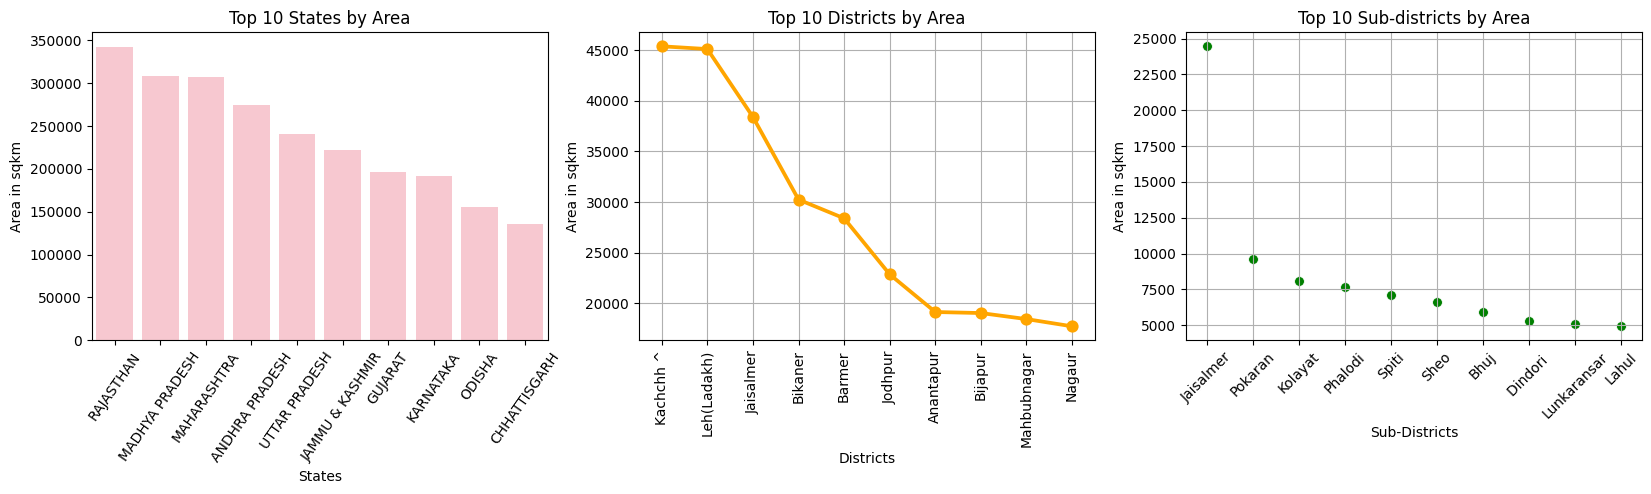

In [239]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 , figsize=(20, 4))


stareadf=censusdf[censusdf['Level']=='STATE'].groupby('Name')['Area in sqkm'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=stareadf,x=stareadf['Name'],y='Area in sqkm',color='pink',ax=ax1)
ax1.set_title("Top 10 States by Area")
ax1.set_xlabel("States")
ax1.set_ylabel("Area in sqkm")
ax1.tick_params(axis='x',rotation=55)



distareadf=censusdf[censusdf['Level']=='DISTRICT'].groupby('Name')['Area in sqkm'].sum().sort_values(ascending=False).reset_index().head(10)
sns.pointplot(data=distareadf,x=distareadf['Name'],y='Area in sqkm',ax=ax2,color='orange')
ax2.set_title("Top 10 Districts by Area")
ax2.set_xlabel("Districts")
ax2.set_ylabel("Area in sqkm")
ax2.tick_params(axis='x',rotation=90)
ax2.grid()



sbdistareadf=censusdf[(censusdf['Level']=='SUB-DISTRICT') & (censusdf['Name']!='Area not under any Sub-district')].groupby('Name')['Area in sqkm'].sum().sort_values(ascending=False).reset_index().head(10)
colors=['red','blue','green','orange','purple','brown','pink','gray','olive','darkblue']
sns.scatterplot(data=sbdistareadf,x=sbdistareadf['Name'],y='Area in sqkm',color='green',s=50,ax=ax3)
ax3.set_title("Top 10 Sub-districts by Area")
ax3.set_xlabel("Sub-Districts")
ax3.set_ylabel("Area in sqkm")
ax3.tick_params(axis='x',rotation=45)
ax3.grid()

print(f"Top 10 States by Area \n{stareadf}")
print(f"\nTop 10 Districts by Area \n{distareadf}")
print(f"\nTop 10 Sub-Districts by Area \n{sbdistareadf}\n")

print("Top 10 Area Comparison Across Administrative Levels",
      "\n--------------------------------------------------")
plt.show()


Top 10 States by Population per sqkm 
            Name  Population per sqkm
0     CHANDIGARH         15857.000000
1   NCT OF DELHI         15437.000000
2     PUDUCHERRY          6695.000000
3  UTTAR PRADESH          6550.000000
4    WEST BENGAL          6419.634088
5          BIHAR          6063.000000
6    MAHARASHTRA          5794.520579
7        HARYANA          4866.000000
8        MANIPUR          4738.378224
9    DAMAN & DIU          4735.214988

Top 10 Districts by Population per sqkm 
              Name  Population per sqkm
0       North East         48338.000000
1             East         40267.000000
2          Central         27730.000000
3          Chennai         26553.000000
4          Kolkata         24306.454054
5         Kishtwar         23726.000000
6             West         21537.000000
7  Mumbai Suburban         20979.735426
8           Mumbai         19652.299363
9            North         18782.000000

Top 10 Sub-Districts by Population per sqkm 
           Name 

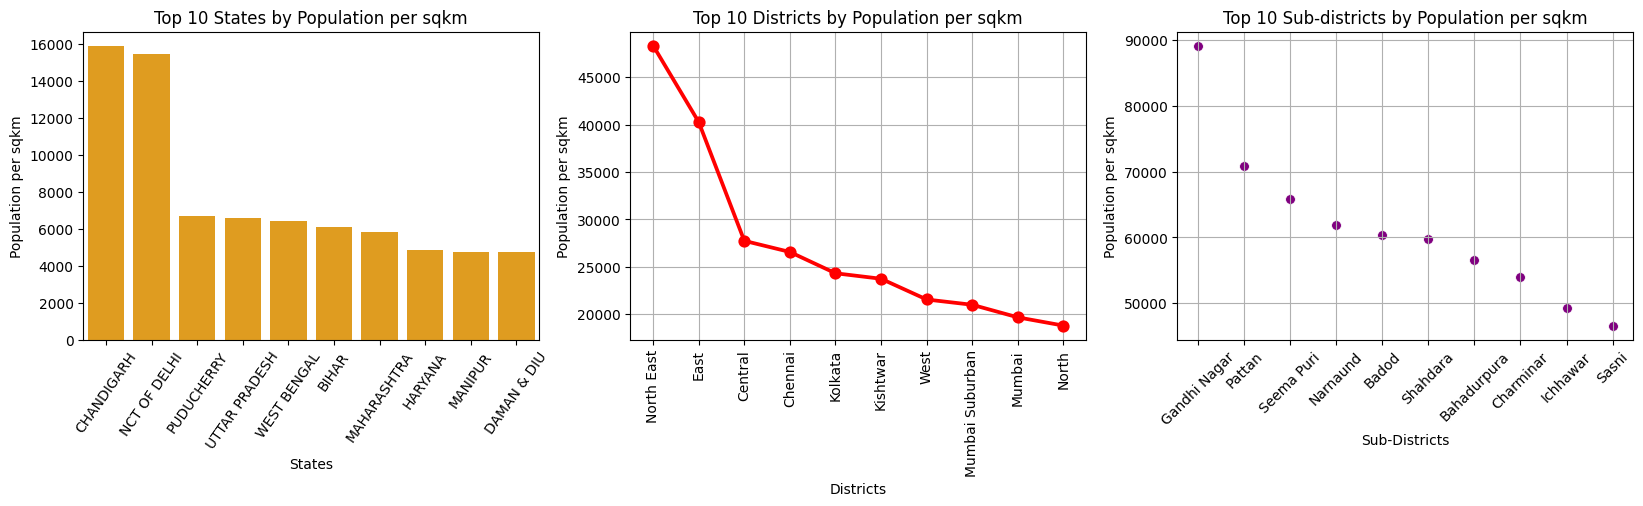

In [240]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 , figsize=(20, 4))


stpopdf=censusdf[censusdf['Level']=='STATE'].groupby('Name')['Population per sqkm'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=stpopdf,x=stpopdf['Name'],y='Population per sqkm',color='orange',ax=ax1)
ax1.set_title("Top 10 States by Population per sqkm")
ax1.set_xlabel("States")
ax1.set_ylabel("Population per sqkm")
ax1.tick_params(axis='x',rotation=55)



distpopdf=censusdf[censusdf['Level']=='DISTRICT'].groupby('Name')['Population per sqkm'].sum().sort_values(ascending=False).reset_index().head(10)
sns.pointplot(data=distpopdf,x=distpopdf['Name'],y='Population per sqkm',ax=ax2,color='red')
ax2.set_title("Top 10 Districts by Population per sqkm")
ax2.set_xlabel("Districts")
ax2.set_ylabel("Population per sqkm")
ax2.tick_params(axis='x',rotation=90)
ax2.grid()



sbdistpopdf=censusdf[(censusdf['Level']=='SUB-DISTRICT') & (censusdf['Name']!='Area not under any Sub-district')].groupby('Name')['Population per sqkm'].sum().sort_values(ascending=False).reset_index().head(10)
colors=['red','blue','green','orange','purple','brown','pink','gray','olive','darkblue']
sns.scatterplot(data=sbdistpopdf,x=sbdistpopdf['Name'],y='Population per sqkm',color='purple',s=50,ax=ax3)
ax3.set_title("Top 10 Sub-districts by Population per sqkm")
ax3.set_xlabel("Sub-Districts")
ax3.set_ylabel("Population per sqkm")
ax3.tick_params(axis='x',rotation=45)
ax3.grid()

print(f"Top 10 States by Population per sqkm \n{stpopdf}")
print(f"\nTop 10 Districts by Population per sqkm \n{distpopdf}")
print(f"\nTop 10 Sub-Districts by Population per sqkm \n{sbdistpopdf}\n")

print("Top 10 Population per sqkm Comparison Across Administrative Levels",
      "\n--------------------------------------------------")
plt.show()
